<a href="https://colab.research.google.com/github/BanavathGanesh/Credit_Card_Default_Prediction.ipynb_/blob/main/Credit_card_Default_prediction_Capstone_project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Predicting whether a customer will default on his/her credit card**

# Problem Description

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

# **Data Description**

# **Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:


* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

* X2: Gender (1 = male; 2 = female).

* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

* X4: Marital status (1 = married; 2 = single; 3 = others).

* X5: Age (year).

* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
# importing liabraries
import pandas as pd  # for data analysis and manupulation
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns # for data visualization
import os  # Import the 'os' module for operating system-related functionality
from scipy.stats import norm  # Import the 'norm' function from the 'scipy.stats' module

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read an Excel file
df = pd.read_excel('/content/drive/MyDrive/0.default of credit card clients.xls')

# Now you can work with the DataFrame 'df'
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
# Remove the first row (header) from the DataFrame
df = df.drop(0)

# Reset the index after removing the row, if needed
df = df.reset_index(drop=True)

# Rename columns in the DataFrame to more descriptive names
df.rename(columns={"Unnamed: 0": "ID", "X1": "LIMIT_BAL", "X2": "SEX", "X3": "EDUCATION", "X4": "MARRIAGE", "X5": "AGE", "X6": "PAY_SEPT", "X7": "PAY_AUG", "X8": "PAY_JUL", "X9": "PAY_JUN", "X10": "PAY_MAY", "X11": "PAY_APRIL", "X12": "BILL_AMT_SEPT", "X13": "BILL_AMT_AUG", "X14": "BILL_AMT_JULY", "X15": "BILL_AMT_JUN", "X16": "BILL_AMT_MAY", "X17": "BILL_AMT_APRIL", "X18": "PAY_AMT_SEPT", "X19": "PAY_AMT_AUG", "X20": "PAY_AMT_JULY", "X21": "PAY_AMT_JUN", "X22": "PAY_AMT_MAY", "X23": "PAY_AMT_APRIL", "Y": "Defaulter"}, inplace=True)

In [ ]:
# looking first 5 rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# looking last 5 rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Defaulter
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
# looking last random 5 rows
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Defaulter
19466,19467,210000,2,3,1,38,-1,-1,-1,-1,...,3087,2811,3204,3920,2529,3087,2811,3204,4173,0
7379,7380,50000,2,2,2,51,0,0,0,0,...,47919,44593,38475,1996,1804,1664,1560,1370,1335,0
29263,29264,80000,1,3,2,23,-1,2,-1,-1,...,125,-68,-261,0,9387,125,0,0,0,0
8817,8818,60000,2,1,2,24,-1,-1,-1,-1,...,-73,-463,7942,390,317,0,0,10000,1000,1
18024,18025,290000,1,1,2,31,2,0,0,0,...,28847,28131,3016,2700,1707,1800,0,0,2411,1


In [ ]:
df.shape

(30000, 25)

# **UNDERSTANDING THE DATA**

In [ ]:
# printing unique values of columns to understand the features
df.nunique()

ID                30000
LIMIT_BAL            81
SEX                   2
EDUCATION             7
MARRIAGE              4
AGE                  56
PAY_SEPT             11
PAY_AUG              11
PAY_JUL              11
PAY_JUN              11
PAY_MAY              10
PAY_APRIL            10
BILL_AMT_SEPT     22723
BILL_AMT_AUG      22346
BILL_AMT_JULY     22026
BILL_AMT_JUN      21548
BILL_AMT_MAY      21010
BILL_AMT_APRIL    20604
PAY_AMT_SEPT       7943
PAY_AMT_AUG        7899
PAY_AMT_JULY       7518
PAY_AMT_JUN        6937
PAY_AMT_MAY        6897
PAY_AMT_APRIL      6939
Defaulter             2
dtype: int64

In [ ]:
df.dtypes

ID                object
LIMIT_BAL         object
SEX               object
EDUCATION         object
MARRIAGE          object
AGE               object
PAY_SEPT          object
PAY_AUG           object
PAY_JUL           object
PAY_JUN           object
PAY_MAY           object
PAY_APRIL         object
BILL_AMT_SEPT     object
BILL_AMT_AUG      object
BILL_AMT_JULY     object
BILL_AMT_JUN      object
BILL_AMT_MAY      object
BILL_AMT_APRIL    object
PAY_AMT_SEPT      object
PAY_AMT_AUG       object
PAY_AMT_JULY      object
PAY_AMT_JUN       object
PAY_AMT_MAY       object
PAY_AMT_APRIL     object
Defaulter         object
dtype: object

In [ ]:
df['ID'] = df['ID'].astype(int)
df['LIMIT_BAL'] = df['LIMIT_BAL'].astype(int)
df['SEX'] = df['SEX'].astype(int)
df['EDUCATION'] = df['EDUCATION'].astype(int)
df['MARRIAGE'] = df['MARRIAGE'].astype(int)
df['AGE'] = df['AGE'].astype(int)
df['PAY_SEPT'] = df['PAY_SEPT'].astype(int)
df['PAY_AUG'] = df['PAY_AUG'].astype(int)
df['PAY_JUL'] = df['PAY_JUL'].astype(int)
df['PAY_JUN'] = df['PAY_JUN'].astype(int)
df['PAY_MAY'] = df['PAY_MAY'].astype(int)
df['PAY_APRIL'] = df['PAY_APRIL'].astype(int)
df['BILL_AMT_SEPT'] = df['BILL_AMT_SEPT'].astype(int)
df['BILL_AMT_AUG'] = df['BILL_AMT_AUG'].astype(int)
df['BILL_AMT_JULY'] = df['BILL_AMT_JULY'].astype(int)
df['BILL_AMT_JUN'] = df['BILL_AMT_JUN'].astype(int)
df['BILL_AMT_MAY'] = df['BILL_AMT_MAY'].astype(int)
df['BILL_AMT_APRIL'] = df['BILL_AMT_APRIL'].astype(int)
df['PAY_AMT_SEPT'] = df['PAY_AMT_SEPT'].astype(int)
df['PAY_AMT_AUG'] = df['PAY_AMT_AUG'].astype(int)
df['PAY_AMT_JULY'] = df['PAY_AMT_JULY'].astype(int)
df['PAY_AMT_JUN'] = df['PAY_AMT_JUN'].astype(int)
df['PAY_AMT_MAY'] = df['PAY_AMT_MAY'].astype(int)
df['PAY_AMT_APRIL'] = df['PAY_AMT_APRIL'].astype(int)
df['Defaulter'] = df['Defaulter'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              30000 non-null  int64
 1   LIMIT_BAL       30000 non-null  int64
 2   SEX             30000 non-null  int64
 3   EDUCATION       30000 non-null  int64
 4   MARRIAGE        30000 non-null  int64
 5   AGE             30000 non-null  int64
 6   PAY_SEPT        30000 non-null  int64
 7   PAY_AUG         30000 non-null  int64
 8   PAY_JUL         30000 non-null  int64
 9   PAY_JUN         30000 non-null  int64
 10  PAY_MAY         30000 non-null  int64
 11  PAY_APRIL       30000 non-null  int64
 12  BILL_AMT_SEPT   30000 non-null  int64
 13  BILL_AMT_AUG    30000 non-null  int64
 14  BILL_AMT_JULY   30000 non-null  int64
 15  BILL_AMT_JUN    30000 non-null  int64
 16  BILL_AMT_MAY    30000 non-null  int64
 17  BILL_AMT_APRIL  30000 non-null  int64
 18  PAY_AMT_SEPT    30000 non-

In [ ]:
df.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Defaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# checking dataset having null values or not
df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Defaulter
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_SEPT          0
PAY_AUG           0
PAY_JUL           0
PAY_JUN           0
PAY_MAY           0
PAY_APRIL         0
BILL_AMT_SEPT     0
BILL_AMT_AUG      0
BILL_AMT_JULY     0
BILL_AMT_JUN      0
BILL_AMT_MAY      0
BILL_AMT_APRIL    0
PAY_AMT_SEPT      0
PAY_AMT_AUG       0
PAY_AMT_JULY      0
PAY_AMT_JUN       0
PAY_AMT_MAY       0
PAY_AMT_APRIL     0
Defaulter         0
dtype: int64

* In the given dataset, there are no null values

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [ ]:
len(df[df.duplicated()])

0

* In the given dataset, there are no duplicated

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APRIL',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APRIL',
       'Defaulter'],
      dtype='object')

#**EDA**

**Dependent variable**

In [ ]:
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

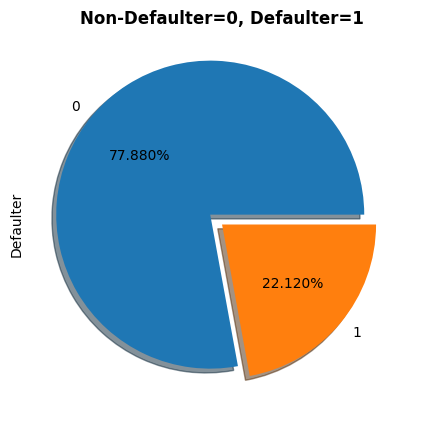

In [ ]:
df['Defaulter'].value_counts().plot(kind="pie",autopct='%1.3f%%',figsize=(7,5), explode=(0.1,0), shadow=True)
plt.title("Non-Defaulter=0, Defaulter=1", fontweight='bold')
plt.show()

**Inference**: From the above data, we can conclude that

* In the dataset, there were 23,364 non-defaulters and 6,636 defaulters

* In the pie charts, non-defaulters make up 77.88%, while defaulters account for 22.12% of the total.

**Independent variables**

**Credit limit balance**

In [ ]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

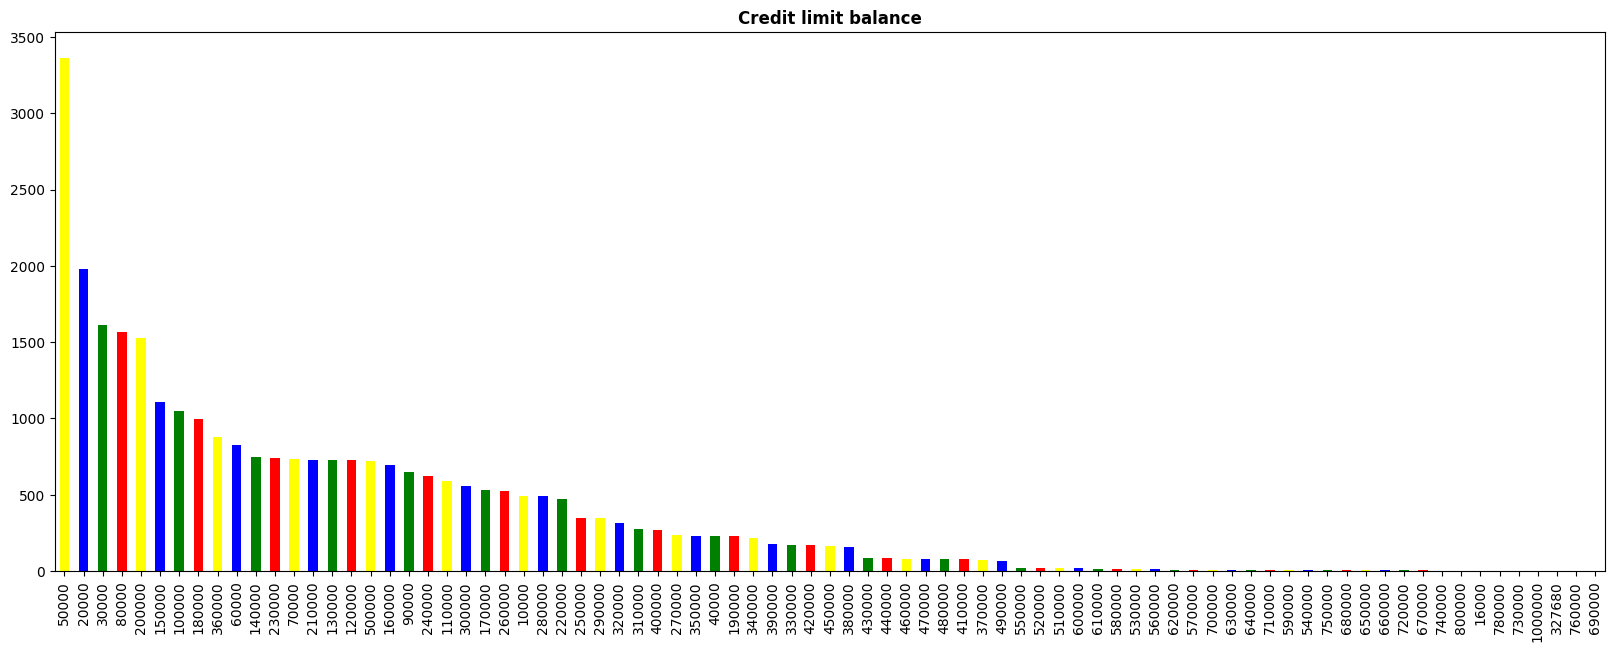

In [ ]:
plt.figure(figsize=(20,7))
df['LIMIT_BAL'].value_counts().plot(kind="bar",color={"green","red","yellow","blue"})
plt.title("Credit limit balance", fontweight = 'bold')
plt.show()

In [ ]:
df['LIMIT_BAL'].max()

1000000

In [ ]:
df['LIMIT_BAL'].min()

10000

From the provided data, it can be inferred that the majority of individuals have an available credit balance falling within the range of 50,000, encompassing a total of 3,365 members.

maximum available credit balance limit is 1,00,000

minimum available credit balance limit is 10,000

 **SEX**

Male-1

Female-2

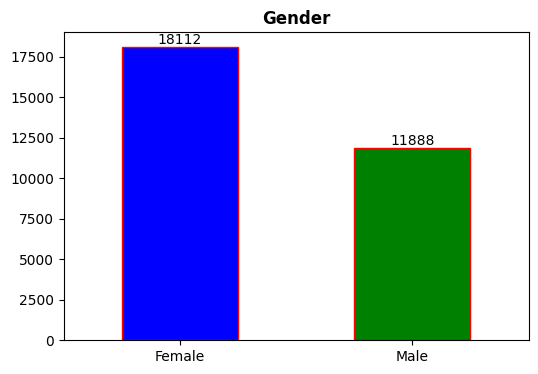

In [ ]:
# Set the figure size to 10 inches in width and 6 inches in height
plt.figure(figsize=(6, 4))

# Create a bar plot to visualize the reservation status
ax = df["SEX"].value_counts().plot(kind="bar", color=["blue", "green"], edgecolor='red')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type="edge", fontsize=10)

# Set the title of the plot
plt.title('Gender', fontweight='bold')

# Set the x-axis tick labels to 'Not Canceled' and 'Canceled'
ax.set_xticklabels(['Female', 'Male'])

# Rotate the x-axis tick labels to 0 degrees
plt.xticks(rotation=0)

# Display the plot
plt.show()


from the above data we can conclude that male are 11,888 and female are 18112.

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

* "The dataset's description states that all numbers, apart from 1, 2,
and 3, should be treated as 0. As a result, in our education dataset, any other numbers, such as 4, 5, and 6, need to be converted to 0."

In the dataset description, it is mentioned that except for categories 1, 2, and 3, all other values are grouped as 4. Therefore, in our dataset, values such as 0, 5, and 6 for education will be consolidated and treated as category 4.

In [ ]:
df["EDUCATION"]=df["EDUCATION"].replace({0:4,5:4,6:4})

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

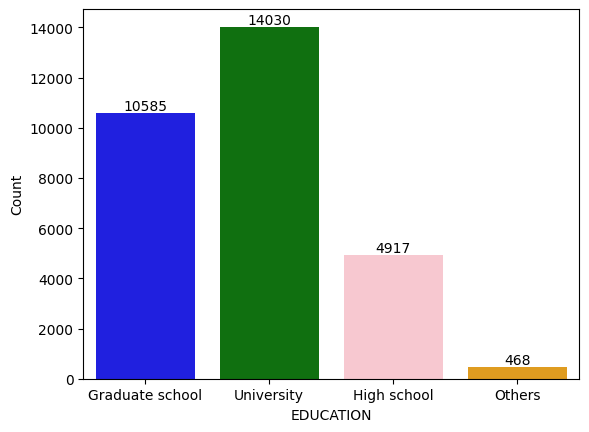

In [ ]:

custom_colors = ["blue", "green", "pink", "orange"]
fig = sns.countplot(x='EDUCATION', data=df, palette=custom_colors)

# Add labels to the bars
for bar in fig.containers:
    fig.bar_label(bar)

# Set custom x-axis labels
fig.set_xticklabels(['Graduate school', 'University', 'High school', 'Others'])

plt.xlabel('EDUCATION')
plt.ylabel('Count')

# Show the plot
plt.show()

From the above data we can conclude that Education in

1. University by 14,030 people


2. graduate school by 10,585 people


3. High school by 4917 people


4. other studying by 468 people



 **MARRIAGE**

Married = 1

Singles = 2

others = 3

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

* In our data describe about married persons represented with 1, singles represented with 2, others represented with 3, but out dataset include "0" but it tells about anything so we simply move to others category

In [ ]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

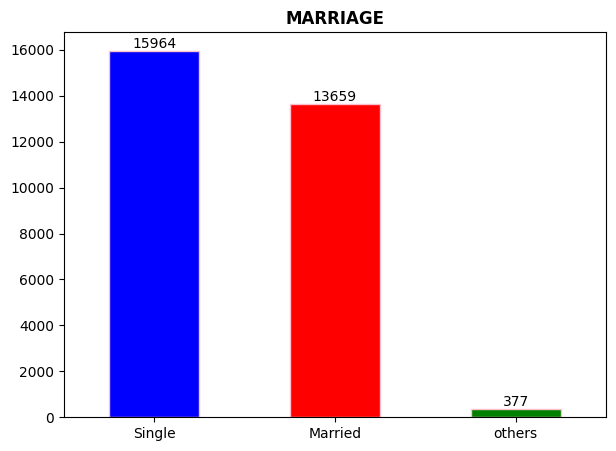

In [ ]:
# Set the figure size to 10 inches in width and 6 inches in height
plt.figure(figsize=(7, 5))

# Create a bar plot to visualize the reservation status
ax = df["MARRIAGE"].value_counts().plot(kind="bar", color=["blue", "red", "green"], edgecolor='pink')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type="edge", fontsize=10)

# Set the title of the plot
plt.title('MARRIAGE', fontweight='bold')

# Set the x-axis tick labels to 'Not Canceled' and 'Canceled'
ax.set_xticklabels(['Single', 'Married', 'others'])

# Rotate the x-axis tick labels to 0 degrees
plt.xticks(rotation=0)

# Display the plot
plt.show()


From the above bar chart, it can be observed that the count of married individuals is 136,59, singles are represented by 15,964, and the category labeled as 'others' consists of 337 individuals.

**AGE**

In [ ]:
Unique_Age = df['AGE'].unique()
print("Unique_Age: ", Unique_Age)

Unique_Age:  [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]


In [ ]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

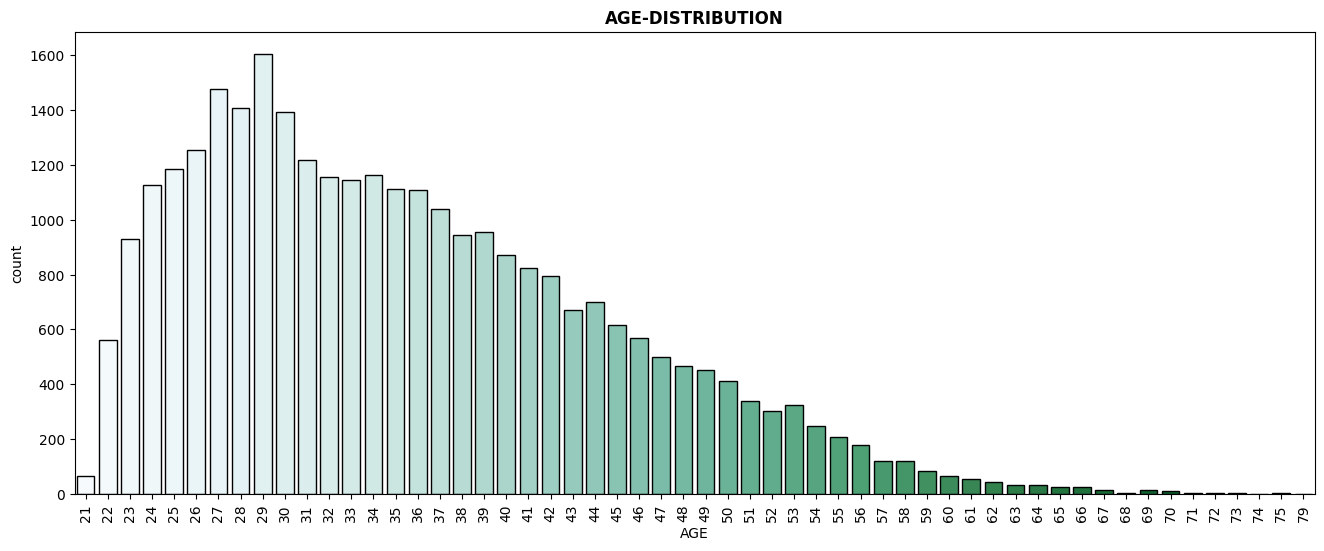

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x="AGE", edgecolor="black", palette='BuGn')
plt.title("AGE-DISTRIBUTION", fontweight='bold')
plt.xticks(rotation=90)
plt.show()

From the above data we can conclude that:

1.most of credit cardholders AGE was 25-45 and above age 60 people are used rarely creditcards.

2.most of 29th age people used huge credit cards that number is 1605 and second place was 27th age people it's number 1477

**Bill AMOUNT**

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APRIL',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APRIL',
       'Defaulter'],
      dtype='object')

In [ ]:
print(df['BILL_AMT_APRIL'].value_counts())
print("\n")
print("\n")


print(df['BILL_AMT_MAY'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_JUN'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_JULY'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_AUG'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_SEPT'].value_counts())

0         4020
390        207
780         86
150         78
316         77
          ... 
26852        1
108660       1
480          1
15298        1
15313        1
Name: BILL_AMT_APRIL, Length: 20604, dtype: int64




0        3506
390       235
780        94
316        79
326        62
         ... 
19341       1
66726       1
80682       1
28508       1
32428       1
Name: BILL_AMT_MAY, Length: 21010, dtype: int64




0         3195
390        246
780        101
316         68
326         62
          ... 
97189        1
118839       1
23567        1
18377        1
36535        1
Name: BILL_AMT_JUN, Length: 21548, dtype: int64




0         2870
390        275
780         74
326         63
316         62
          ... 
19580        1
45129        1
227807       1
39330        1
49764        1
Name: BILL_AMT_JULY, Length: 22026, dtype: int64




0        2506
390       231
326        75
780        75
316        72
         ... 
26357       1
85195       1
6889        1
11004       1


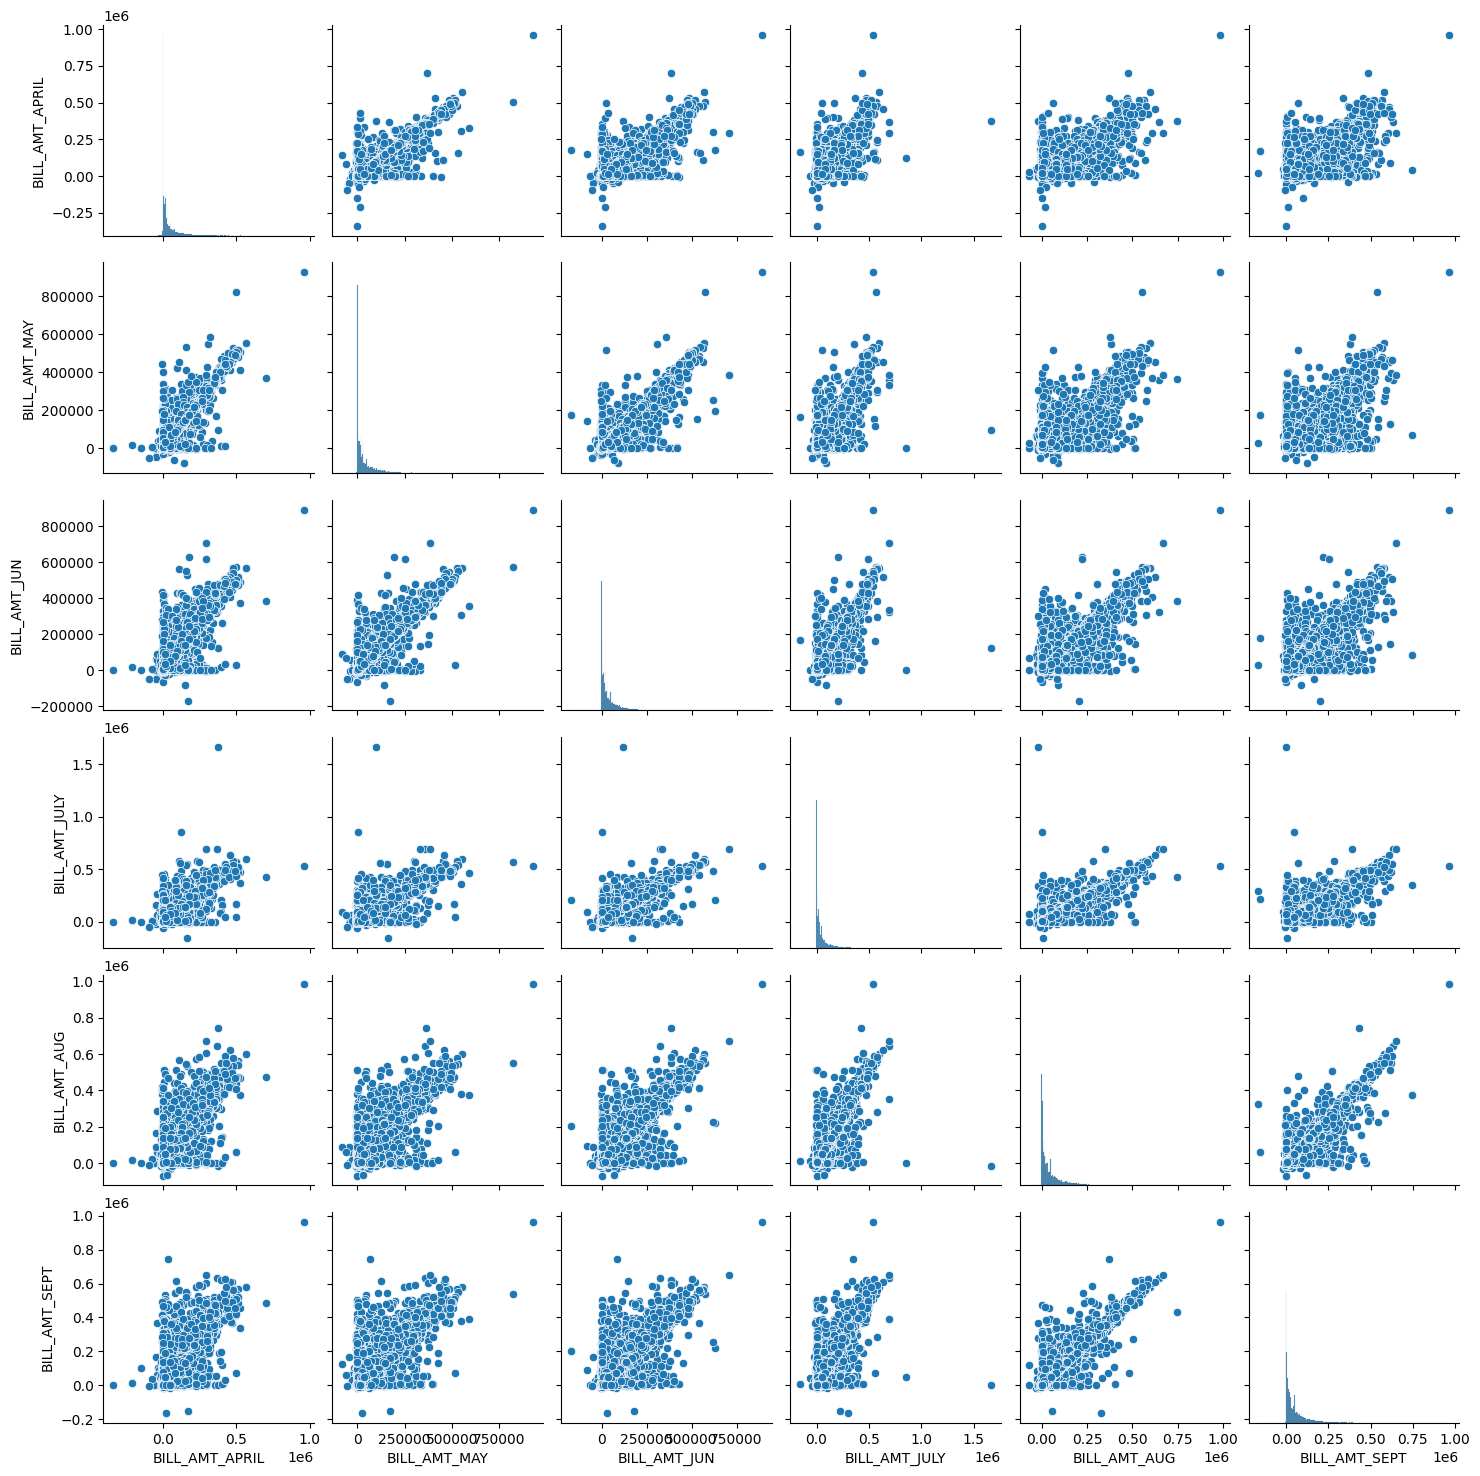

In [ ]:
bill_amount=df[['BILL_AMT_APRIL',  'BILL_AMT_MAY',   'BILL_AMT_JUN',   'BILL_AMT_JULY',   'BILL_AMT_AUG',   'BILL_AMT_SEPT']]

sns.pairplot(data=bill_amount)
plt.show()

* The above pairplot shows that distribution of bill amount statements for each month explicitly for defaulters and non-defaulters

**Previous payments**

In [ ]:
df.groupby(['PAY_SEPT','Defaulter']).size()

PAY_SEPT  Defaulter
-2        0             2394
          1              365
-1        0             4732
          1              954
 0        0            12849
          1             1888
 1        0             2436
          1             1252
 2        0              823
          1             1844
 3        0               78
          1              244
 4        0               24
          1               52
 5        0               13
          1               13
 6        0                5
          1                6
 7        0                2
          1                7
 8        0                8
          1               11
dtype: int64

In [ ]:
df.groupby(['PAY_AUG','Defaulter']).size()

PAY_AUG  Defaulter
-2       0             3091
         1              691
-1       0             5084
         1              966
 0       0            13227
         1             2503
 1       0               23
         1                5
 2       0             1743
         1             2184
 3       0              125
         1              201
 4       0               49
         1               50
 5       0               10
         1               15
 6       0                3
         1                9
 7       0                8
         1               12
 8       0                1
dtype: int64

In [ ]:
df.groupby(['PAY_JUL','Defaulter']).size()

PAY_JUL  Defaulter
-2       0             3328
         1              757
-1       0             5012
         1              926
 0       0            13013
         1             2751
 1       0                3
         1                1
 2       0             1850
         1             1969
 3       0              102
         1              138
 4       0               32
         1               44
 5       0                9
         1               12
 6       0                9
         1               14
 7       0                5
         1               22
 8       0                1
         1                2
dtype: int64

In [ ]:
df.groupby(['PAY_JUN','Defaulter']).size()

PAY_JUN  Defaulter
-2       0             3511
         1              837
-1       0             4783
         1              904
 0       0            13439
         1             3016
 1       0                1
         1                1
 2       0             1506
         1             1653
 3       0               70
         1              110
 4       0               23
         1               46
 5       0               17
         1               18
 6       0                3
         1                2
 7       0               10
         1               48
 8       0                1
         1                1
dtype: int64

In [ ]:
df.groupby(['PAY_MAY','Defaulter']).size()

PAY_MAY  Defaulter
-2       0             3651
         1              895
-1       0             4642
         1              897
 0       0            13752
         1             3195
 2       0             1203
         1             1423
 3       0               65
         1              113
 4       0               33
         1               51
 5       0                7
         1               10
 6       0                1
         1                3
 7       0               10
         1               48
 8       1                1
dtype: int64

In [ ]:
df.groupby(['PAY_APRIL','Defaulter']).size()

PAY_APRIL  Defaulter
-2         0             3914
           1              981
-1         0             4765
           1              975
 0         0            13217
           1             3069
 2         0             1365
           1             1401
 3         0               66
           1              118
 4         0               18
           1               31
 5         0                6
           1                7
 6         0                5
           1               14
 7         0                8
           1               38
 8         1                2
dtype: int64

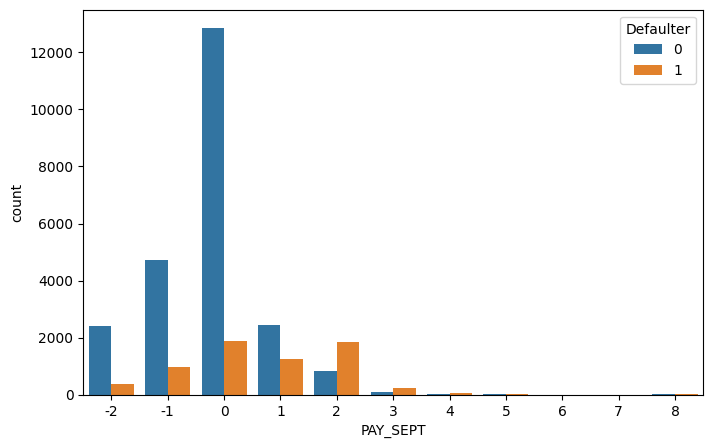

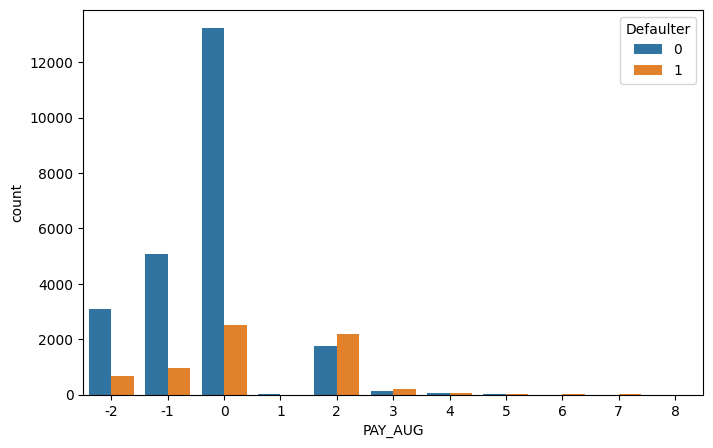

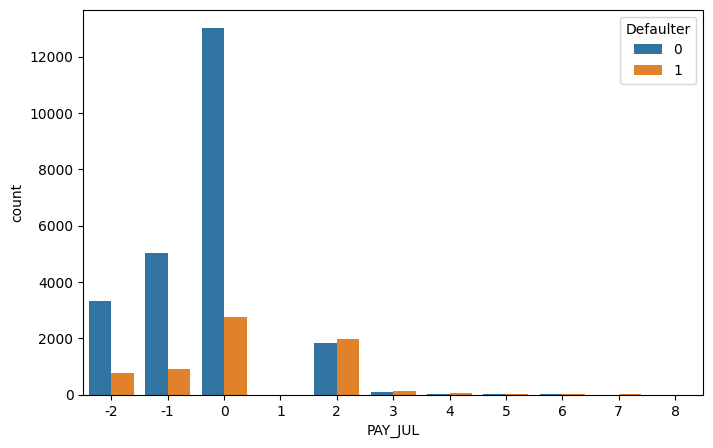

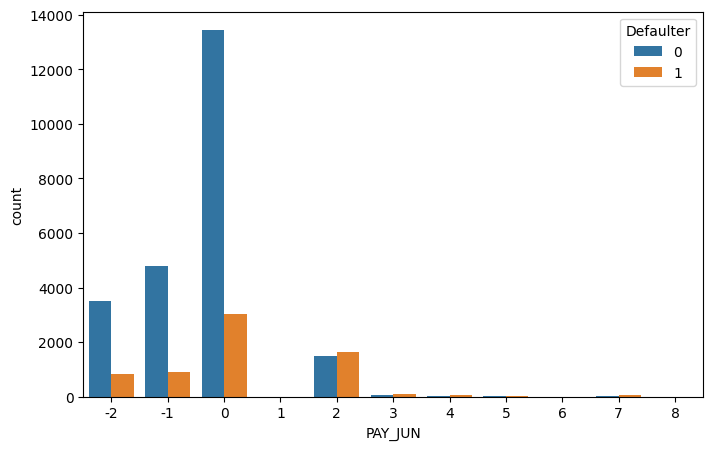

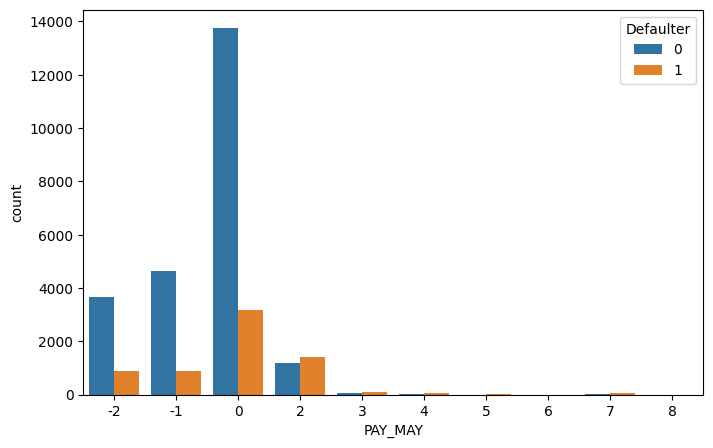

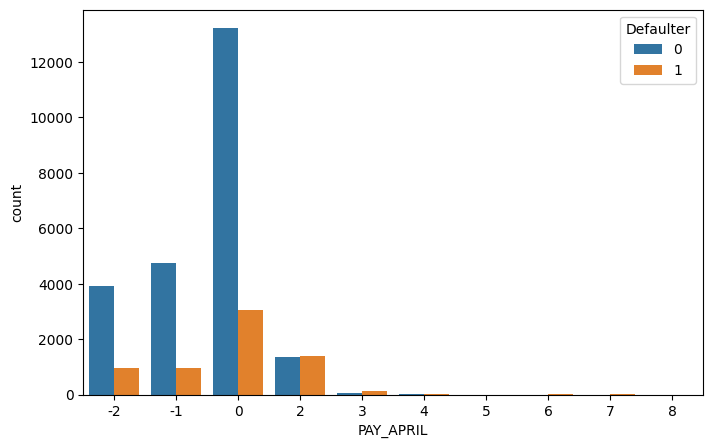

In [ ]:
payment=["PAY_SEPT",   "PAY_AUG", "PAY_JUL",  "PAY_JUN",  "PAY_MAY",  "PAY_APRIL"]

for col in payment:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col, hue="Defaulter" , data= df)

From the above data we can conclude that :

**PAY_SEPT**:

1. In the payment of september month single rupee not recieve from
Non-defaulters were 2394 persons, and from defaulters were 365 persons

2. Full amount received from Non-defaulters were 4732 persons and defaulters were 954 persons 3. Minmum amount recevied from Non- defaulters were 12,849 persons and Defaulters were 1888 persons

**PAY_AUG**:

1. In the payment of september month single rupee not recieve from
Non-defaulters were 3,091 persons, and from defaulters were 691 persons

2. Full amount received from Non-defaulters were 5,084 persons and defaulters were 966 persons 3. Minmum amount recevied from Non- defaulters were 13,227 persons and Defaulters were 2,503 persons

**PAY_JULY**

1. In the payment of september month single rupee not recieve from
Non-defaulters were 3328 persons, and from defaulters were 757 persons

2. Full amount received from Non-defaulters were 5012 persons and defaulters were 926 persons 3. Minmum amount recevied from Non- defaulters were 13,013 persons and Defaulters were 2,751 persons

**PAY_JUN**

1. In the payment of september month single rupee not recieve from
Non-defaulters were 3,511 persons, and from defaulters were 837persons

2. Full amount received from Non-defaulters were 4,783 persons and defaulters were 904 persons 3. Minmum amount recevied from Non- defaulters were 13,439persons and Defaulters were 3,016persons

**PAY_MAY**

1. In the payment of september month single rupee not recieve from
Non-defaulters were 3,651persons, and from defaulters were 895persons

2. Full amount received from Non-defaulters were 4,642 persons and defaulters were 897 persons 3. Minmum amount recevied from Non- defaulters were 13,752persons and Defaulters were 3,195persons

**PAY_APRIL**

1. In the payment of september month single rupee not recieve from
Non-defaulters were 3,914persons, and from defaulters were 981persons

2. Full amount received from Non-defaulters were 4,765 persons and defaulters were 975 persons 3. Minmum amount recevied from Non- defaulters were 13,217persons and Defaulters were 3,069persons

COMMON POINT Representing others numbers like 1,2,3,4,5,6,7,8 Delaying payment in months

**The distribution of amount of previous payment for each month.**

In [ ]:
pay_amount = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JULY',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APRIL']]


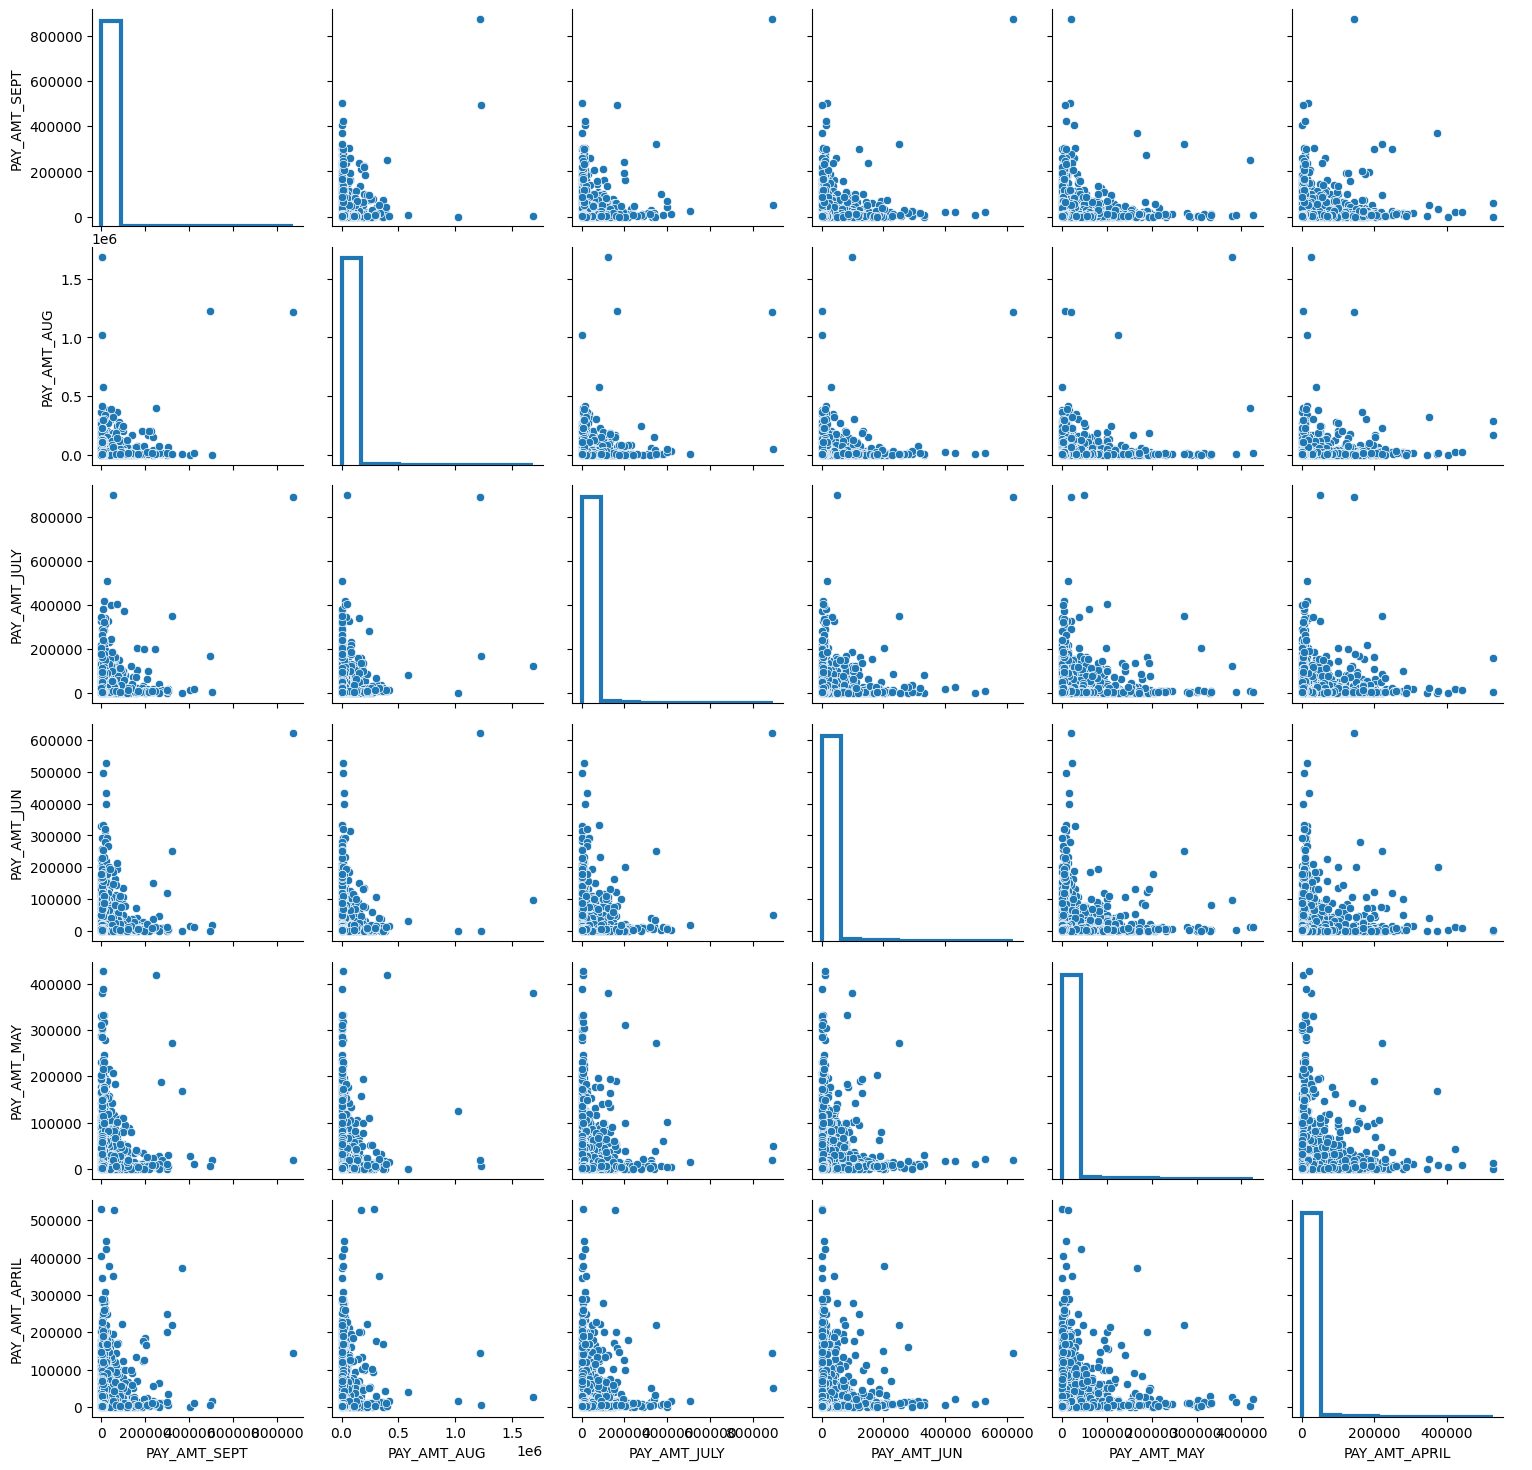

In [ ]:
g=sns.PairGrid(pay_amount  ,palette="bright")
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_diag(plt.hist, histtype="step",linewidth=3)
g.add_legend()

* From the pairplot said that each month of the payment states Defaulers and Non-defaulters

**Bivariate Analysis**

**Defaulters vs sex**

In [ ]:
df.groupby(['SEX','Defaulter']).size()

SEX  Defaulter
1    0             9015
     1             2873
2    0            14349
     1             3763
dtype: int64

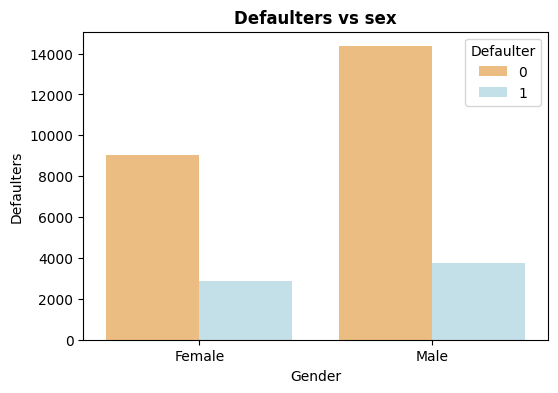

In [ ]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Create the countplot
ax = sns.countplot(x='SEX', hue='Defaulter', data=df, palette='RdYlBu')

# Set the x-axis tick labels to 'Female' and 'Male'
ax.set_xticklabels(['Female', 'Male'])

# Set the title and axes labels
plt.title('Defaulters vs sex', size=12, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Defaulters')

# Display the plot
plt.show()

From the above figure we can conclude that defaultres were females, their number was 3763 and Height Non- defaultrs also famales it's number 14,349


**EDUCATION VS Defaulters**

In [ ]:
df.groupby(['EDUCATION','Defaulter']).size()

EDUCATION  Defaulter
1          0             8549
           1             2036
2          0            10700
           1             3330
3          0             3680
           1             1237
4          0              435
           1               33
dtype: int64

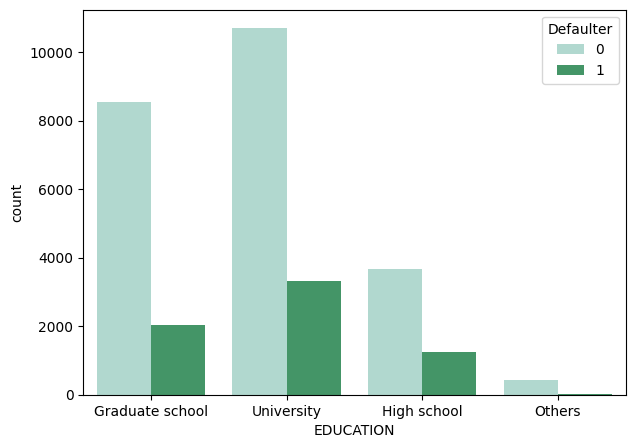

In [ ]:
# Create a figure and set its size
plt.figure(figsize=(7, 5))

# Create the countplot
sns.countplot(x='EDUCATION', hue='Defaulter', data=df, palette='BuGn')

# Set custom x-axis labels
plt.xticks([0, 1, 2, 3], ['Graduate school', 'University', 'High school', 'Others'])

# Show the plot
plt.show()


From the above data we can conclude that most of the defaulters who did study in University people its number was 3,330 and after that graduate school people are defaulter their number was 2036

**MARRIAGE PEOPLE VS Defaulter**

In [ ]:
df.groupby(['MARRIAGE','Defaulter']).size()

MARRIAGE  Defaulter
1         0            10453
          1             3206
2         0            12623
          1             3341
3         0              288
          1               89
dtype: int64



1.   Married
2.   Single
3.   Others



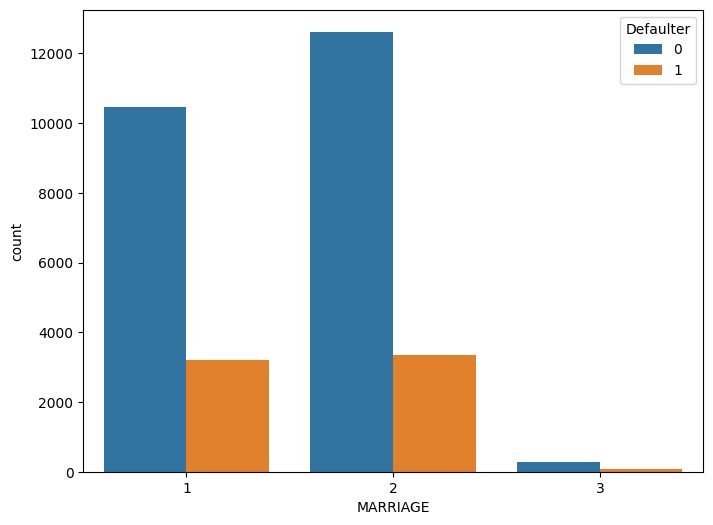

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='MARRIAGE',hue='Defaulter',data=df)
plt.show()

From the above data we can conclude that most of the defaulters were singles their numbers was 3341 and defaulters in married people were 3206 and defaulters in others were 89

**AGE VS Defaulter**

In [ ]:
df.groupby(['AGE','Defaulter']).size()

AGE  Defaulter
21   0             53
     1             14
22   0            391
     1            169
23   0            684
                 ... 
73   1              3
74   0              1
75   0              2
     1              1
79   0              1
Length: 109, dtype: int64

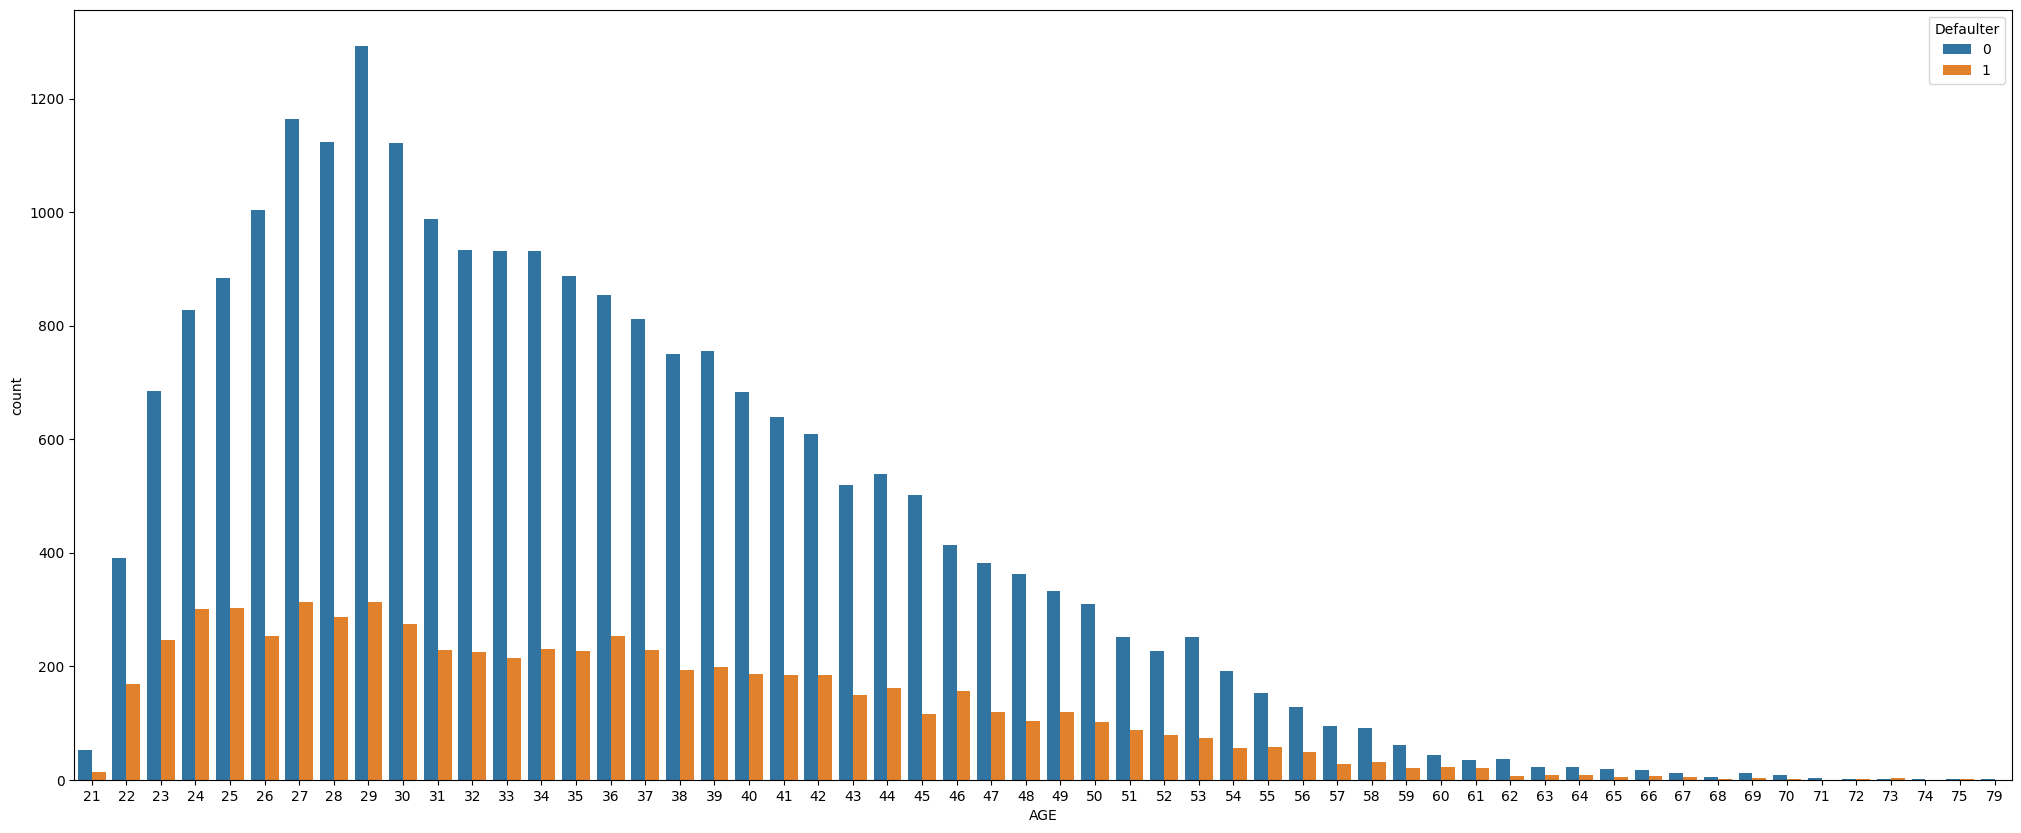

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='AGE',hue='Defaulter',data=df)
plt.show()

From the above data we can conclude that

1.most of the 27th age people defaulters

2.least defaulters were above 60age people were defaulters

In [ ]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


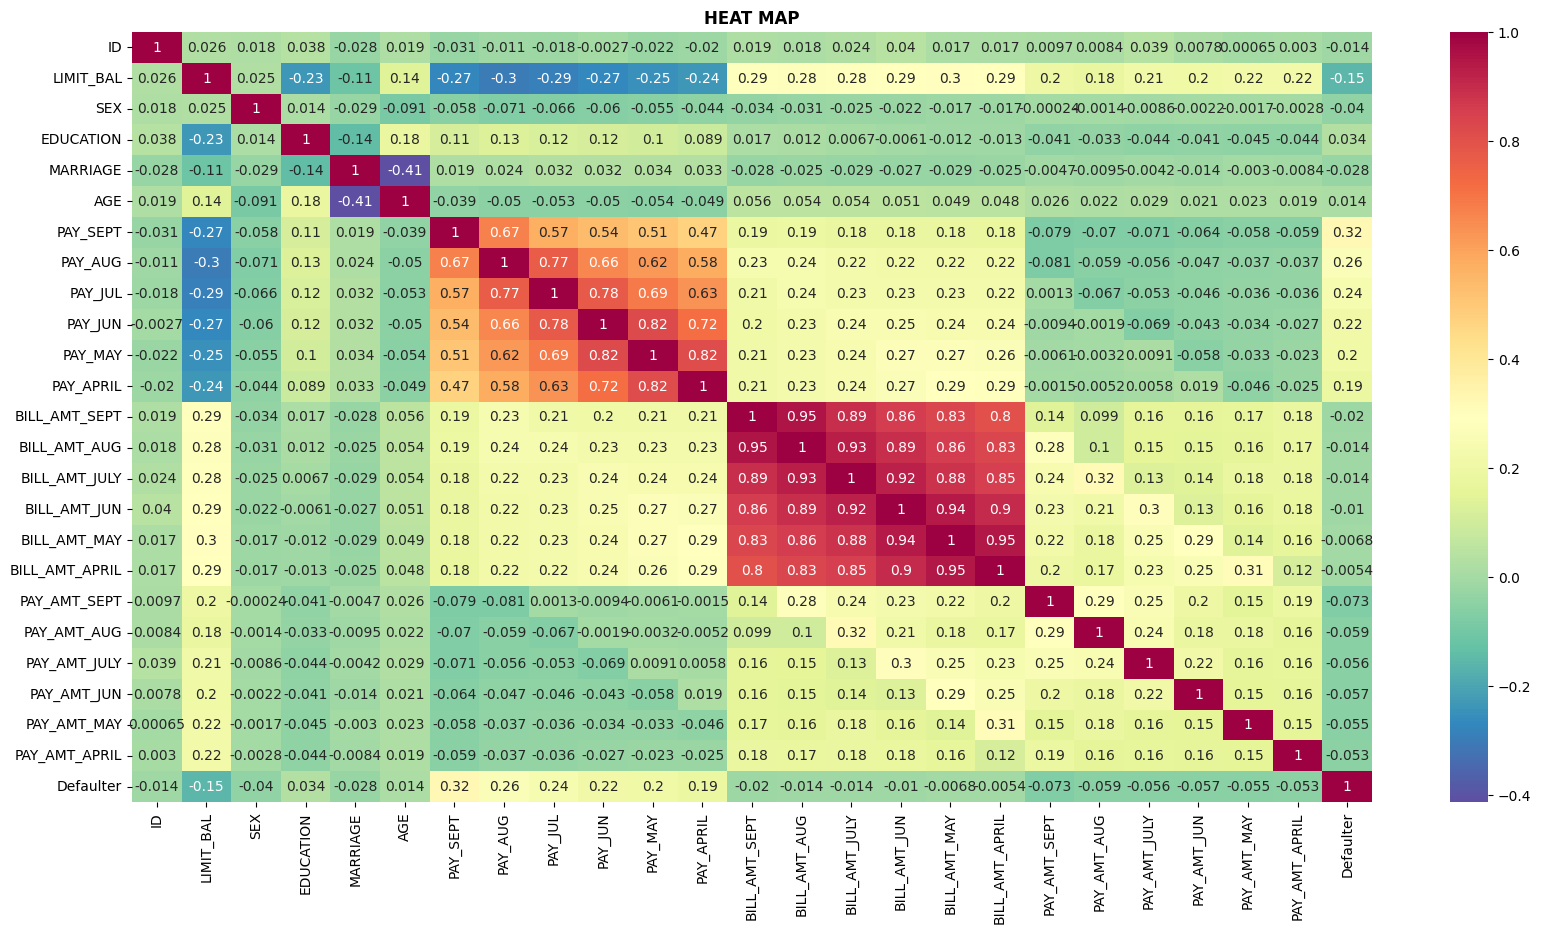

In [ ]:
plt.figure (figsize= (20,10))
corelation= df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP", fontweight='bold')
plt.show()

* From the above heatmap we can conclude that correlationship between anytwo columns ,some part of data having positive HIGHLY correlation , some part of data having negative correlation , some part of data shows zero correlation AND those who are multicolinear are need to remove Highely correlated items "PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" removed

In [ ]:
# dropping unimportant column of ID
df.drop(['ID'], axis=1, inplace=True)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["BILL_AMT_SEPT","PAY_SEPT","PAY_AMT_SEPT"]]])

,variables,VIF
0,LIMIT_BAL,4.003045
1,SEX,9.147414
2,EDUCATION,7.392732
3,MARRIAGE,6.370812
4,AGE,11.344949
5,PAY_AUG,2.688993
6,PAY_JUL,3.683127
7,PAY_JUN,4.426665
8,PAY_MAY,4.983845
9,PAY_APRIL,3.460441


* Highely correlated items "PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" removed

In [ ]:
df['Payement_Value'] = df['PAY_SEPT'] + df['PAY_AUG'] + df['PAY_JUL'] + df['PAY_JUN'] + df['PAY_MAY']

In [ ]:
df.drop(["PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" ],axis=1,inplace=True)

In [ ]:
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

* Here dataset is imbalanced dataset so we need to do the balance using SMOTE

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APRIL,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,Defaulter,Payement_Value
0,20000,2,2,1,24,2,-1,-1,-2,-2,...,0,0,0,689,0,0,0,0,1,0
1,120000,2,2,2,26,2,0,0,0,2,...,3272,3455,3261,1000,1000,1000,0,2000,1,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,0,-1,0,0,0,...,20940,19146,19131,36681,10000,9000,689,679,0,-2


**Feature Engineering**

ONE HOT ENCODING

In [ ]:
df = pd.get_dummies(df,columns=['SEX','MARRIAGE',"EDUCATION"])

In [ ]:
df.head(1)

,LIMIT_BAL,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APRIL,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUN,...,Payement_Value,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,20000,24,2,-1,-1,-2,-2,3102,689,0,...,0,0,1,1,0,0,0,1,0,0


In [ ]:
df.shape

(30000, 28)

In [ ]:
# creating dependent variable and independent variable
independendent_variable=df.drop(['Defaulter'],axis=1)

dependent_variable=df['Defaulter']

In [ ]:
X=independendent_variable
y=dependent_variable

In [ ]:
X.head()

,LIMIT_BAL,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APRIL,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUN,...,Payement_Value,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,20000,24,2,-1,-1,-2,-2,3102,689,0,...,0,0,1,1,0,0,0,1,0,0
1,120000,26,2,0,0,0,2,1725,2682,3272,...,1,0,1,0,1,0,0,1,0,0
2,90000,34,0,0,0,0,0,14027,13559,14331,...,0,0,1,0,1,0,0,1,0,0
3,50000,37,0,0,0,0,0,48233,49291,28314,...,0,0,1,1,0,0,0,1,0,0
4,50000,57,0,-1,0,0,0,5670,35835,20940,...,-2,1,0,1,0,0,0,1,0,0


In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Defaulter, dtype: int64

In [ ]:
# spliting  unbalanced dataset  train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state =17,stratify = y)
print(X_train.shape)
print(X_test.shape)

(24000, 27)
(6000, 27)


**APPLYING SMOTE(Synthetic Minority Oversampling Technique**

In [ ]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X,y)

from collections import Counter
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_sm))
Counter(y_train_sm)

Original dataset shape Counter({0: 18691, 1: 5309})
Resample dataset shape Counter({1: 23364, 0: 23364})


Counter({1: 23364, 0: 23364})

**Model evaluations**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve,classification_report


In [ ]:
def print_metrics(actual, predicted):
  print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
  print(' precision_score is {}'.format( precision_score(actual, predicted)))

  print('recall_score is {}'.format(recall_score(actual, predicted)))
  print('f1_score is {}'.format(f1_score(actual, predicted)))
  print('roc_auc_score is {}'.format( roc_auc_score(actual , predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual , predicted)))
  print('classification_report is {}'.format(classification_report(actual , predicted)))

**Implementing logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# spiliting  balanced dataset as training and testing  after applying SMOTE
X_train_os, X_test_os, y_train_os, y_test_os= train_test_split(X_train_sm,y_train_sm, test_size = 0.20, random_state = 17,stratify=y_train_sm)


In [ ]:
lr= LogisticRegression()

In [ ]:
# fitting logistic regression
param_grid = {'penalty':['l1','l2'], 'C' : [100,150,200] }

log_model= GridSearchCV(lr, param_grid, scoring = 'accuracy', cv =5)
log_model.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 150, 200], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
optimized_log=log_model.best_estimator_
optimized_log

LogisticRegression(C=100)

In [ ]:
log_model.best_params_

{'C': 100, 'penalty': 'l2'}

In [ ]:
log_model.best_score_

0.6134772746642405

In [ ]:
# model score  on training data
print(f"training_model_score:  {log_model.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {log_model.score(X_test_os,y_test_os)}")

training_model_score:  0.6076453908298112
testing_model_score:  0.6118125401241172


In [ ]:
 # to predict the probability
y_train_pred = log_model.predict_proba(X_train_os)[:,1]
y_test_pred = log_model.predict_proba(X_test_os)[:,1]

In [ ]:
y_train_pred

array([0.19722943, 0.45822562, 0.09487986, ..., 0.49840807, 0.52664533,
       0.54698929])

In [ ]:
y_test_pred

array([0.55236824, 0.29015263, 0.3156566 , ..., 0.38367837, 0.46347784,
       0.10593556])

* Here the probability said about the NON-Defaulter and defaulters

In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds = log_model.predict(X_train_os)
y_test_class_preds = log_model.predict(X_test_os)

In [ ]:
y_test_class_preds

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: Defaulter, Length: 6000, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds)

accuracy_score is 0.6076453908298112
 precision_score is 0.6075130918029283
recall_score is 0.6082606602107966
f1_score is 0.6078866461702981
roc_auc_score is 0.6076453908298112
confusion_matrix is [[11346  7345]
 [ 7322 11369]]
classification_report is               precision    recall  f1-score   support

           0       0.61      0.61      0.61     18691
           1       0.61      0.61      0.61     18691

    accuracy                           0.61     37382
   macro avg       0.61      0.61      0.61     37382
weighted avg       0.61      0.61      0.61     37382



[[11346  7345]
 [ 7322 11369]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

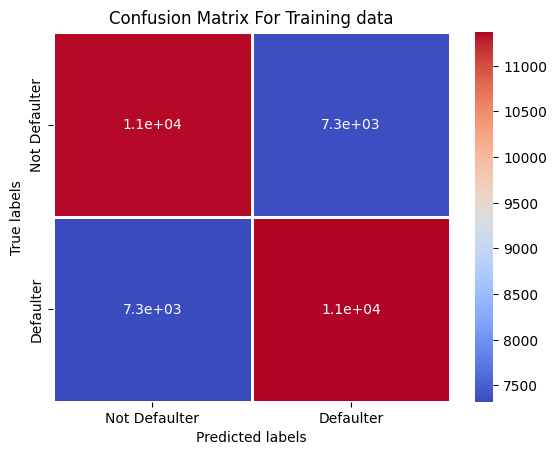

In [ ]:
# Get the confusion matrix for  training  data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

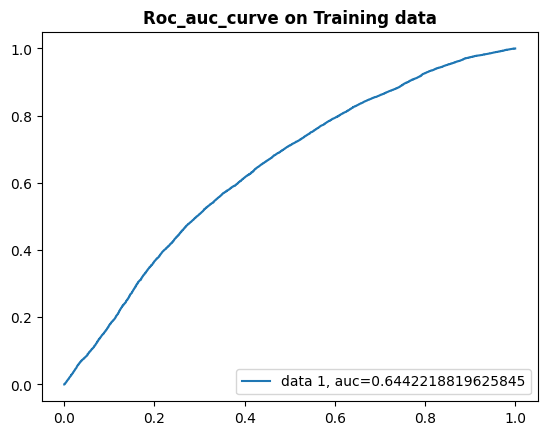

In [ ]:
# Roc_auc_curve
y_train_pred = log_model.predict_proba(X_train_os)[:,1]
fpr, tpr, _ = roc_curve(y_train_os,  y_train_pred )
auc = roc_auc_score(y_train_os,  y_train_pred  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data", fontweight='bold')
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds)

accuracy_score is 0.6118125401241172
 precision_score is 0.6111938710363907
recall_score is 0.6145944789214637
f1_score is 0.6128894579598805
roc_auc_score is 0.6118125401241172
confusion_matrix is [[2846 1827]
 [1801 2872]]
classification_report is               precision    recall  f1-score   support

           0       0.61      0.61      0.61      4673
           1       0.61      0.61      0.61      4673

    accuracy                           0.61      9346
   macro avg       0.61      0.61      0.61      9346
weighted avg       0.61      0.61      0.61      9346



[[2846 1827]
 [1801 2872]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

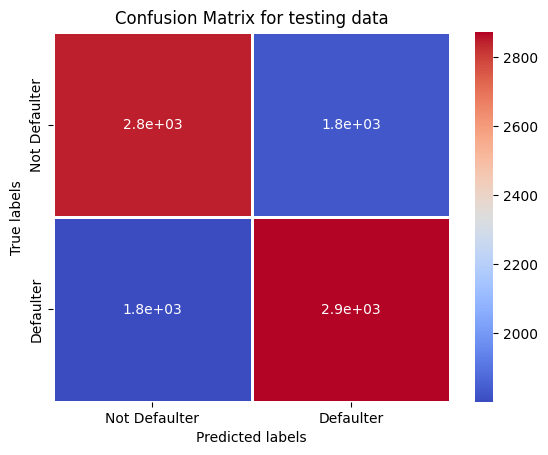

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

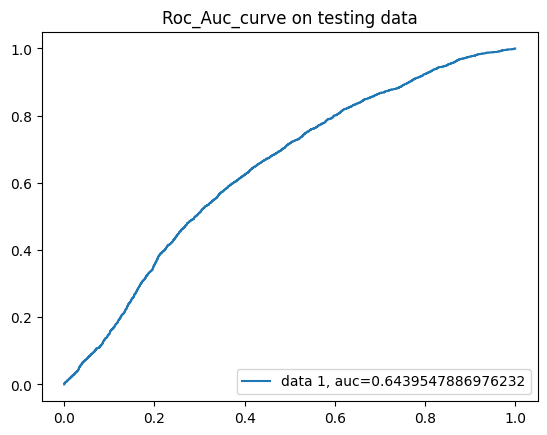

In [ ]:
# Roc_auc_curve
y_test_proba= log_model.predict_proba(X_test_os)[:,1]
fpr, tpr, _ = roc_curve(y_test_os,  y_test_proba )
auc = roc_auc_score(y_test_os, y_test_proba )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_Auc_curve on testing data")
plt.legend(loc=4)
plt.show()

* We have implemented logistic regression and we getting accuracy_score is approx 62%. and precision score approx is 62% and f1_score is 62%and roc_auc approx is 62% As we have imbalanced dataset, recall_score is approx 63% better parameter. Let's go ahead with other models and see if they can give better result.

**Implementing Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf= RandomForestClassifier()
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
rf_grid = GridSearchCV(rf, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
rf_grid.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [ ]:
rf_grid.best_params_

{'max_depth': 14, 'n_estimators': 70}

In [ ]:
optimized_rf=rf_grid.best_estimator_
optimized_rf

RandomForestClassifier(max_depth=14, n_estimators=70)

In [ ]:
rf_grid.best_score_

0.8637846950373154

In [ ]:
# model score  on training data
print(f"training_model_score:  {rf_grid.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {rf_grid.score(X_test_os,y_test_os)}")

training_model_score:  0.93050131079129
testing_model_score:  0.8594050930879521


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_rf = rf_grid.predict(X_train_os)
y_test_class_preds_rf = rf_grid.predict(X_test_os)

In [ ]:
y_test_class_preds_rf

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: Defaulter, Length: 6000, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_rf)

accuracy_score is 0.93050131079129
 precision_score is 0.9740206185567011
recall_score is 0.8845968648012412
f1_score is 0.9271575169629339
roc_auc_score is 0.9305013107912898
confusion_matrix is [[18250   441]
 [ 2157 16534]]
classification_report is               precision    recall  f1-score   support

           0       0.89      0.98      0.93     18691
           1       0.97      0.88      0.93     18691

    accuracy                           0.93     37382
   macro avg       0.93      0.93      0.93     37382
weighted avg       0.93      0.93      0.93     37382



[[18250   441]
 [ 2157 16534]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

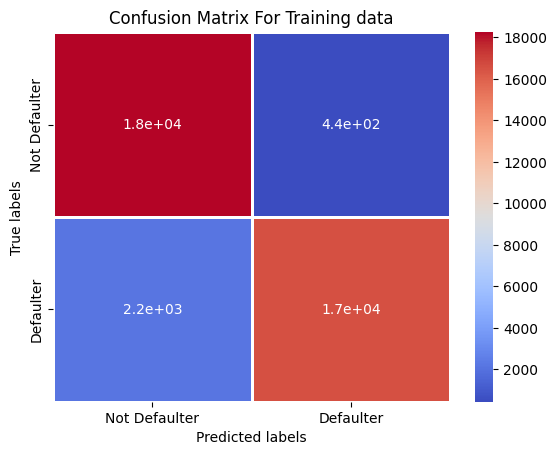

In [ ]:
# Get the confusion matrix for  training  data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

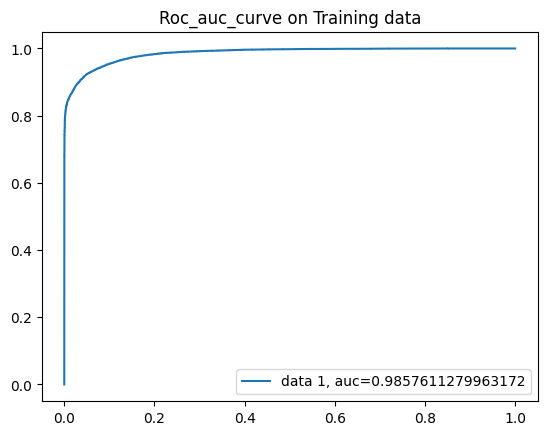

In [ ]:
# Roc_auc_curve
y_train_preds_proba_rf = rf_grid.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_rf )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_rf)

accuracy_score is 0.8594050930879521
 precision_score is 0.8995955270045206
recall_score is 0.8091161994436122
f1_score is 0.85196034249662
roc_auc_score is 0.859405093087952
confusion_matrix is [[4251  422]
 [ 892 3781]]
classification_report is               precision    recall  f1-score   support

           0       0.83      0.91      0.87      4673
           1       0.90      0.81      0.85      4673

    accuracy                           0.86      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.86      0.86      0.86      9346



[[4251  422]
 [ 892 3781]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

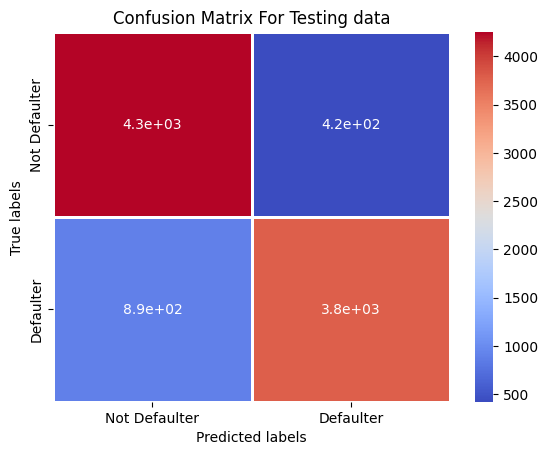

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

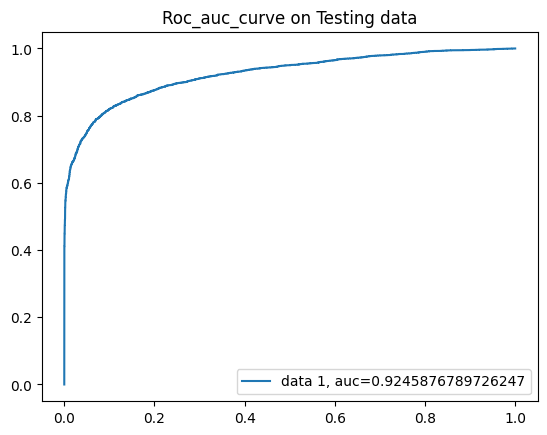

In [ ]:
# Roc_auc_curve
y_test_preds_proba_rf = rf_grid.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_rf )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

* We have implemented Random Forest and we getting accuracy_score is approx 86%. and recall_score is approx 82% and f1_score is 85% and ROC_AUC score is 86% ,precision score is approx 90% better parameter. Let's go ahead with other models and see if they can give better result.

# **Implementing KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, scoring = 'accuracy',cv=3)
knn_cv.fit(X_train_os,y_train_os)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [ ]:
knn_cv.best_score_

0.7071320347198616

In [ ]:
knn_cv.best_params_

{'n_neighbors': 5}

In [ ]:
optimized_knn=knn_cv.best_estimator_
optimized_knn

KNeighborsClassifier()

In [ ]:
# model score  on training data
print(f"training_model_score:  {knn_cv.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {knn_cv.score(X_test_os,y_test_os)}")

training_model_score:  0.8334225028088385
testing_model_score:  0.7378557671731222


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_knn = knn_cv.predict(X_train_os)
y_test_class_preds_knn = knn_cv.predict(X_test_os)

In [ ]:
y_test_class_preds_knn

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
y_test_os

38707    1
26884    1
19454    0
12363    0
4518     0
        ..
19740    0
35793    1
32857    1
17947    0
1027     0
Name: Defaulter, Length: 9346, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_knn)

accuracy_score is 0.8334225028088385
 precision_score is 0.7778174037089871
recall_score is 0.9334974051682629
f1_score is 0.8485762225518567
roc_auc_score is 0.8334225028088386
confusion_matrix is [[13707  4984]
 [ 1243 17448]]
classification_report is               precision    recall  f1-score   support

           0       0.92      0.73      0.81     18691
           1       0.78      0.93      0.85     18691

    accuracy                           0.83     37382
   macro avg       0.85      0.83      0.83     37382
weighted avg       0.85      0.83      0.83     37382



[[13707  4984]
 [ 1243 17448]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

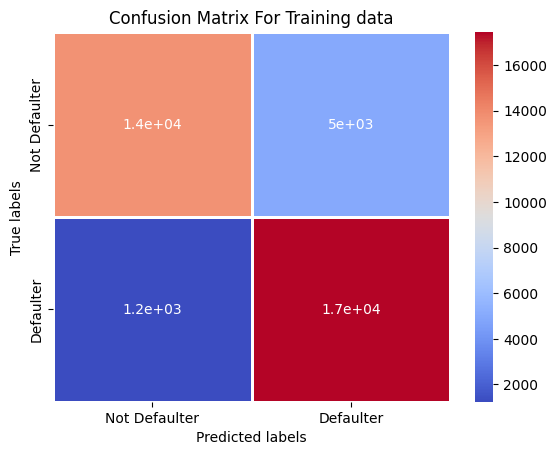

In [ ]:
# Get the confusion matrix for  training  data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

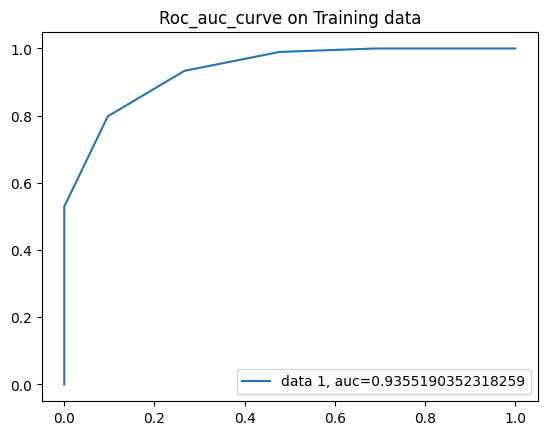

In [ ]:
# Roc_auc_curve on taining data
y_train_preds_proba_knn = knn_cv.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_knn )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_knn)

accuracy_score is 0.7378557671731222
 precision_score is 0.6894494630986876
recall_score is 0.8656109565589557
f1_score is 0.7675521821631879
roc_auc_score is 0.7378557671731222
confusion_matrix is [[2851 1822]
 [ 628 4045]]
classification_report is               precision    recall  f1-score   support

           0       0.82      0.61      0.70      4673
           1       0.69      0.87      0.77      4673

    accuracy                           0.74      9346
   macro avg       0.75      0.74      0.73      9346
weighted avg       0.75      0.74      0.73      9346



[[2851 1822]
 [ 628 4045]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

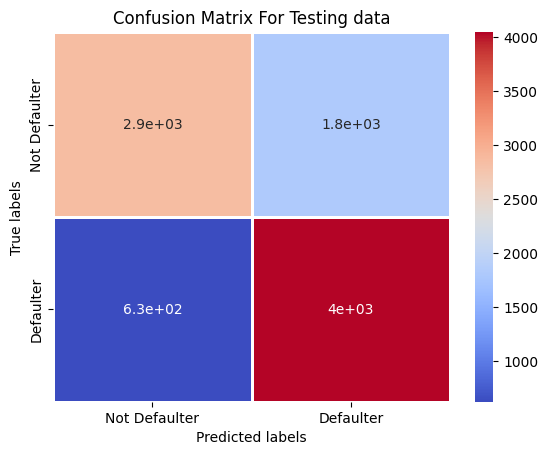

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

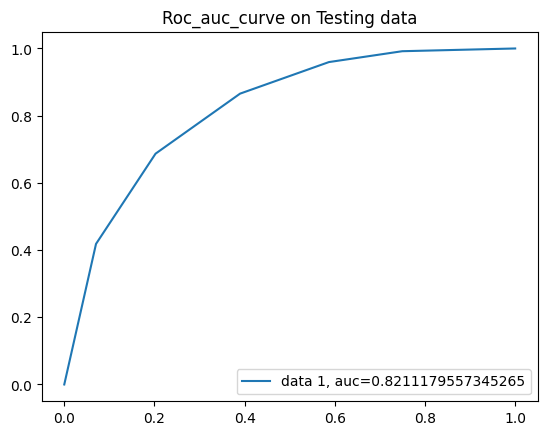

In [ ]:
# Roc_auc_curve testing data
y_test_preds_proba_knn = knn_cv.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_knn )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

* We have implemented KNN and we getting accuracy_score is approx 75%. and precision score is approx 70% and f1_score is 76% and ROC_AUC score is 75% ,recall_score is approx 88% better parameter

# **Implementing XG boost Algorithm**

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
param_test1 = {
 'max_depth':range(2,3,6),
 'min_child_weight':range(1,2,6)}

In [ ]:
# xg boost with grid search cv
xgb_grid = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1 ,objective= 'binary:logistic'),
 param_grid = param_test1, scoring='roc_auc', cv=3)

In [ ]:
xgb_grid.fit(X_train_os,y_train_os)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': range(2, 3, 6),
                         'min_child_weight': range(1, 2, 6)},
             scoring='roc_auc')

In [ ]:
xgb_grid.best_params_

{'max_depth': 2, 'min_child_weight': 1}

In [ ]:
optimized_xgb=xgb_grid.best_estimator_
optimized_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_grid.best_score_

0.9126230099277376

In [ ]:
# model score  on training data
print(f"training_model_score:  {xgb_grid.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {xgb_grid.score(X_test_os,y_test_os)}")

training_model_score:  0.914778043960581
testing_model_score:  0.9078555872027609


In [ ]:
# Get the predicted classes
y_train_class_preds_xgb = xgb_grid.predict(X_train_os)
y_test_class_preds_xgb = xgb_grid.predict(X_test_os)

In [ ]:
y_test_class_preds_xgb

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test_os

38707    1
26884    1
19454    0
12363    0
4518     0
        ..
19740    0
35793    1
32857    1
17947    0
1027     0
Name: Defaulter, Length: 9346, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_xgb)

accuracy_score is 0.8486437322775667
 precision_score is 0.890092786590841
recall_score is 0.7955165587716013
f1_score is 0.840151429540061
roc_auc_score is 0.8486437322775667
confusion_matrix is [[16855  1836]
 [ 3822 14869]]
classification_report is               precision    recall  f1-score   support

           0       0.82      0.90      0.86     18691
           1       0.89      0.80      0.84     18691

    accuracy                           0.85     37382
   macro avg       0.85      0.85      0.85     37382
weighted avg       0.85      0.85      0.85     37382



[[16855  1836]
 [ 3822 14869]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

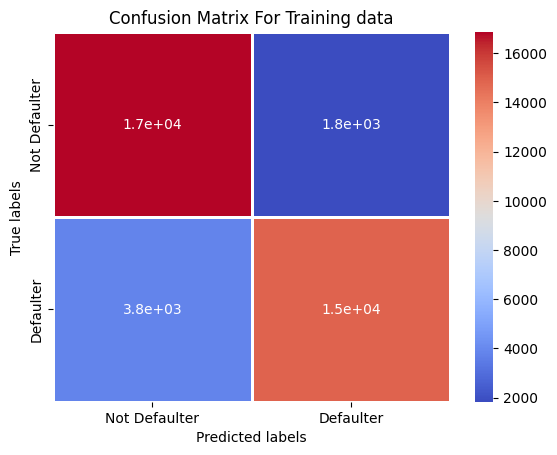

In [ ]:
# Get the confusion matrix for  training  data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

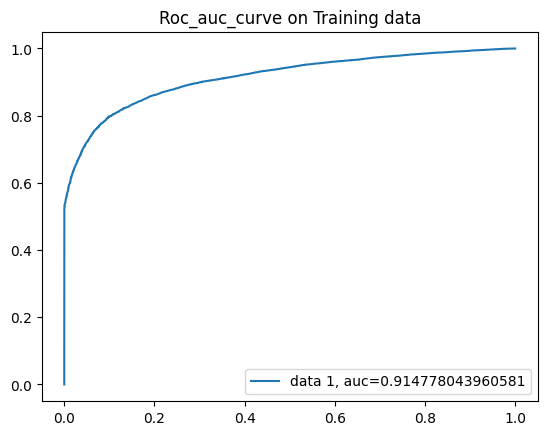

In [ ]:
# Roc_auc_curve on taining data
y_train_preds_proba_xgb = xgb_grid.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_xgb )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_xgb )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_xgb)

accuracy_score is 0.8374705756473357
 precision_score is 0.8801832208293153
recall_score is 0.7812968114701476
f1_score is 0.8277973018932093
roc_auc_score is 0.8374705756473357
confusion_matrix is [[4176  497]
 [1022 3651]]
classification_report is               precision    recall  f1-score   support

           0       0.80      0.89      0.85      4673
           1       0.88      0.78      0.83      4673

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



[[4176  497]
 [1022 3651]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

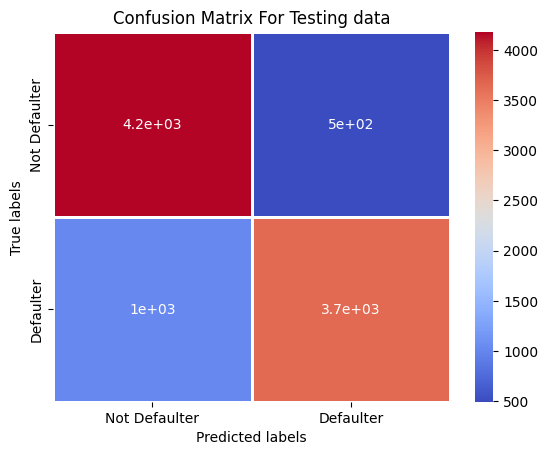

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

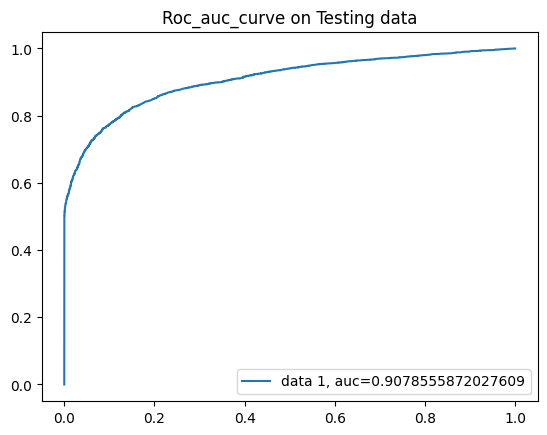

In [ ]:
# Roc_auc_curve testing data
y_test_preds_proba_xgb = xgb_grid.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_xgb)
auc = roc_auc_score(y_test_os,  y_test_preds_proba_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

* We have implemented XGBOOST WITH GRID SEARCH CV and we getting accuracy_score is approx 84%. and recall_score is approx 78% and f1_score is 83% and ROC_AUC score is 84% ,precision score is approx 89% better parameter

# **Model Summary For Train data**

In [ ]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train accuracy_score ", "Train Precision_score", "Train Recall_score","Train f1_score",'Train ROC_AUC_Score'])
train.add_row(['1','Logistic Regression','0.6177572093520945','0.6144089822226843',' 0.6323899202824889','0.6232697935616546'," 0.6177572093520945"])
train.add_row(['2','Random_Forest_classifier',' 0.9318121020812156','0.9737614463489082','0.8875394574929111','0.9286533993898173'," 0.9318121020812155"])
train.add_row(['3','KNN_Classifier ','0.8327804825852014','0.7761498845675724','0.9353164624685678','0.8483319179910227',"0.8327804825852015"])
train.add_row(['4','XGBoost_Classifier','0.844818361778396','0.8935637518319492','0.7828901610400728','0.8345738158382526'," 0.8448183617783961"])

print(train)

+-------+--------------------------+-----------------------+-----------------------+---------------------+--------------------+---------------------+
| SL NO |        MODEL_NAME        | Train accuracy_score  | Train Precision_score |  Train Recall_score |   Train f1_score   | Train ROC_AUC_Score |
+-------+--------------------------+-----------------------+-----------------------+---------------------+--------------------+---------------------+
|   1   |   Logistic Regression    |   0.6177572093520945  |   0.6144089822226843  |  0.6323899202824889 | 0.6232697935616546 |  0.6177572093520945 |
|   2   | Random_Forest_classifier |   0.9318121020812156  |   0.9737614463489082  |  0.8875394574929111 | 0.9286533993898173 |  0.9318121020812155 |
|   3   |     KNN_Classifier       |   0.8327804825852014  |   0.7761498845675724  |  0.9353164624685678 | 0.8483319179910227 |  0.8327804825852015 |
|   4   |    XGBoost_Classifier    |   0.844818361778396   |   0.8935637518319492  |  0.782890161040

# **Model summary for Test data**

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test accuracy_score  ", "Test Precision_score","Test Recall_score","Test f1_score",'Test ROC_AUC_Score'])
test.add_row(['1','Logistic Regression','0.6196233682858977','0.6176346801346801','0.6280761823239889','0.6228116710875332',"0.6196233682858977"])
test.add_row(['2','Random_Forest_classifier','0.8607960624866253',' 0.896519285042333','0.815750053498823','0.8542296918767507',"0.8607960624866253"])
test.add_row(['3','KNN_Classifier ',' 0.7472715600256794','0.6969490369865349','0.8750267494115129','0.7759013282732449',"0.7472715600256794"])
test.add_row(['4','XGBOOST_Classifier',' 0.8400385191525787',' 0.8864299610894941','0.7800128397175262','0.829823562891292',"0.8400385191525788"])

print(test)

+-------+--------------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME        | Test accuracy_score   | Test Precision_score | Test Recall_score  |   Test f1_score    | Test ROC_AUC_Score |
+-------+--------------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+
|   1   |   Logistic Regression    |   0.6196233682858977  |  0.6176346801346801  | 0.6280761823239889 | 0.6228116710875332 | 0.6196233682858977 |
|   2   | Random_Forest_classifier |   0.8607960624866253  |   0.896519285042333  | 0.815750053498823  | 0.8542296918767507 | 0.8607960624866253 |
|   3   |     KNN_Classifier       |   0.7472715600256794  |  0.6969490369865349  | 0.8750267494115129 | 0.7759013282732449 | 0.7472715600256794 |
|   4   |    XGBOOST_Classifier    |   0.8400385191525787  |  0.8864299610894941  | 0.7800128397175262 | 0.82982356289

**#Conclusion :** We used diffent type of Classification algorithms to train our model like, Logistic Regression, Random Forest Classifier,KNN_Classifier, XGboost_Classifier. and Also we tuned the parameters of Random forest classifier and XGboost classifier ,KNN_ Out of them Random forest classifier ( tuned hyperparameters gave) the best result. it's Highest

* Precision score is approx 90%,

* Recall score is approx 82%

* ROC_Auc score is approx 86%,

* and Accuracy_score is approx 86%,

* and It's F1_score approx is 85%